## K Means Elbow Method  
Initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. km.inertia_
As k increases, the sum of squared distance tends to zero.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [7]:
data[continuous_features].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
data[categorical_features].head()

,Channel,Region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3


In [9]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
    
data.head()
# dummies.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [10]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [11]:
data_transformed[:3]

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [12]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

As k increases, the sum of squared distance tends to zero.  
Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above.  
If the plot looks like an arm, then the elbow on the arm is optimal k.

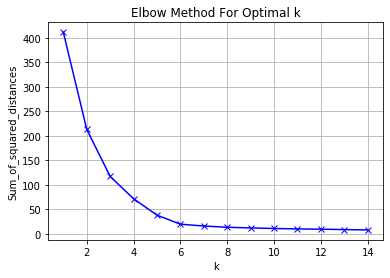

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

In [14]:
km_elbow = KMeans(n_clusters=5)
km_elbow = km.fit(data_transformed)

In [15]:
y_kmeans = km_elbow.predict(data_transformed)

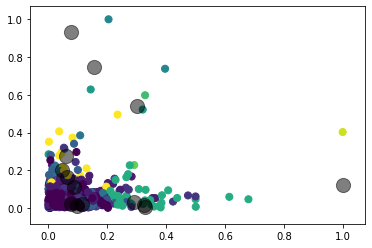

In [21]:
plt.scatter(data_transformed[:, 0], data_transformed[:,2],c=y_kmeans, s=50, cmap='viridis')

centers = km_elbow.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 4], c='black', s=200, alpha=0.5);

In [20]:
km_elbow

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)